In [1]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('updated_with_anomalies_xgboost_stammdaten.csv')

In [2]:
x = df.head(10)
print(x)

   Fulfillment time  Fixed contract 1  Fixed contract 2  Total quantity  \
0               NaN               NaN               NaN             NaN   
1               NaN               NaN               NaN             NaN   
2               NaN               NaN               NaN             NaN   
3               NaN               NaN               NaN             NaN   
4               NaN               NaN               NaN             NaN   
5               NaN               NaN               NaN             NaN   
6               NaN               NaN               NaN             NaN   
7               NaN               NaN               NaN             NaN   
8               NaN               NaN               NaN             NaN   
9               NaN               NaN               NaN             NaN   

   Total value  Price unit  Plant processing time  Material master time  \
0          NaN   -0.478047                    0.0             -0.983458   
1          NaN   -0.4780

In [1]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('final_anomalies.csv')
# Check the unique values in the 'algorithm' column
unique_algorithms = df['algorithm'].unique()
print("Unique algorithms in the dataset:", unique_algorithms)

# Filter the DataFrame for IForest and XGBOD algorithms
iforest_df = df[df['algorithm'] == 'IForest']
xgboost_df = df[df['algorithm'] == 'XGBOD']

# Check if the filtered DataFrames are not empty
print(f"Number of rows with IForest algorithm: {len(iforest_df)}")
print(f"Number of rows with XGBOD algorithm: {len(xgboost_df)}")

# Find the intersection of data points based on the 'uuid' column
intersection_uuids = set(iforest_df['uuid']).intersection(set(xgboost_df['uuid']))

# Filter the original DataFrame to get the intersected data points
intersection_df = df[df['uuid'].isin(intersection_uuids)]

# Display the intersection DataFrame
print("Intersection DataFrame:")
print(intersection_df)

# Optionally, save the intersection DataFrame to a new CSV file
intersection_df.to_csv('intersection_data.csv', index=False)



Unique algorithms in the dataset: ['kNN' 'ECOD, COPOD' 'ECOD, kNN, COPOD, IForest' 'ECOD, kNN, COPOD'
 'ECOD, COPOD, IForest' 'kNN, IForest' 'ECOD' 'IForest' 'ECOD, kNN'
 'COPOD' 'IForest, ECOD, COPOD' 'IForest, ECOD'
 'kNN, IForest, ECOD, COPOD' 'kNN, IForest, COPOD' 'IForest, COPOD'
 'RoSAS' 'XGBOD' 'XGBOD, RoSAS']
Number of rows with IForest algorithm: 71
Number of rows with XGBOD algorithm: 47
Intersection DataFrame:
Empty DataFrame
Columns: [Materialnummer, Lieferant OB, Vertrag OB, Vertragsposition OB, Planlieferzeit Vertrag, Vertrag Fix1, Vertrag_Fix2, Beschaffungsart, Sonderbeschaffungsart, Disponent, Einkäufer, DispoGruppe, Dispolosgröße, Gesamtbestand, Gesamtwert, Preis pro Stück, Preiseinheit, Kalender, Werk OB, Werk Infosatz, Infosatznummer, Infosatztyp, WE_Bearbeitungszeit, Planlieferzeit Mat-Stamm, Warengruppe, Basiseinheit, correct, uuid, outlier_features, algorithm, anomaly_normal]
Index: []

[0 rows x 31 columns]


Intersection DataFrame:
Empty DataFrame
Columns: [Materialnummer, Lieferant OB, Vertrag OB, Vertragsposition OB, Planlieferzeit Vertrag, Vertrag Fix1, Vertrag_Fix2, Beschaffungsart, Sonderbeschaffungsart, Disponent, Einkäufer, DispoGruppe, Dispolosgröße, Gesamtbestand, Gesamtwert, Preis pro Stück, Preiseinheit, Kalender, Werk OB, Werk Infosatz, Infosatznummer, Infosatztyp, WE_Bearbeitungszeit, Planlieferzeit Mat-Stamm, Warengruppe, Basiseinheit, correct, uuid, outlier_features, algorithm, anomaly_normal]
Index: []

[0 rows x 31 columns]


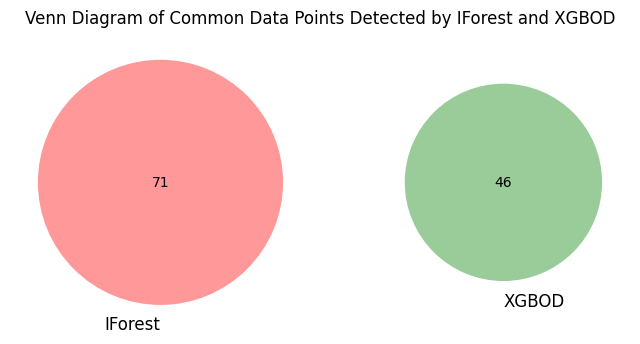

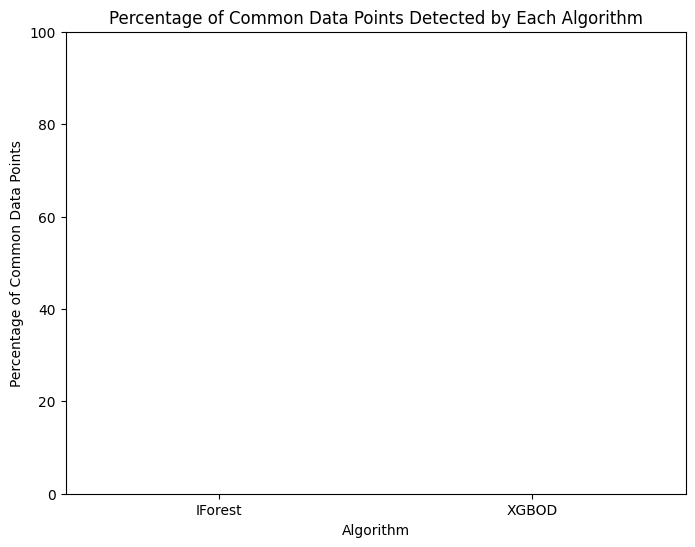

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the dataset from a CSV file
df = pd.read_csv('final_anomalies.csv')

# Filter the DataFrame for IForest and XGBOD algorithms
iforest_df = df[df['algorithm'] == 'IForest']
xgboost_df = df[df['algorithm'] == 'XGBOD']

# Find the intersection of data points based on the 'uuid' column
iforest_uuids = set(iforest_df['uuid'])
xgboost_uuids = set(xgboost_df['uuid'])
intersection_uuids = iforest_uuids.intersection(xgboost_uuids)

# Filter the original DataFrame to get the intersected data points
intersection_df = df[df['uuid'].isin(intersection_uuids)]

# Display the intersection DataFrame
print("Intersection DataFrame:")
print(intersection_df)

# Optionally, save the intersection DataFrame to a new CSV file
intersection_df.to_csv('intersection_data.csv', index=False)

# Venn Diagram
plt.figure(figsize=(8, 8))
venn2([iforest_uuids, xgboost_uuids], ('IForest', 'XGBOD'))
plt.title('Venn Diagram of Common Data Points Detected by IForest and XGBOD')
plt.show()

# Bar Plot for percentage of common data points
total_iforest = len(iforest_uuids)
total_xgboost = len(xgboost_uuids)
common_count = len(intersection_uuids)

percent_common_iforest = (common_count / total_iforest) * 100 if total_iforest else 0
percent_common_xgboost = (common_count / total_xgboost) * 100 if total_xgboost else 0

# Data for bar plot
data = {
    'Algorithm': ['IForest', 'XGBOD'],
    'Percentage of Common Data Points': [percent_common_iforest, percent_common_xgboost]
}
percentage_df = pd.DataFrame(data)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(percentage_df['Algorithm'], percentage_df['Percentage of Common Data Points'], color=['blue', 'orange'])
plt.xlabel('Algorithm')
plt.ylabel('Percentage of Common Data Points')
plt.title('Percentage of Common Data Points Detected by Each Algorithm')
plt.ylim(0, 100)
plt.show()


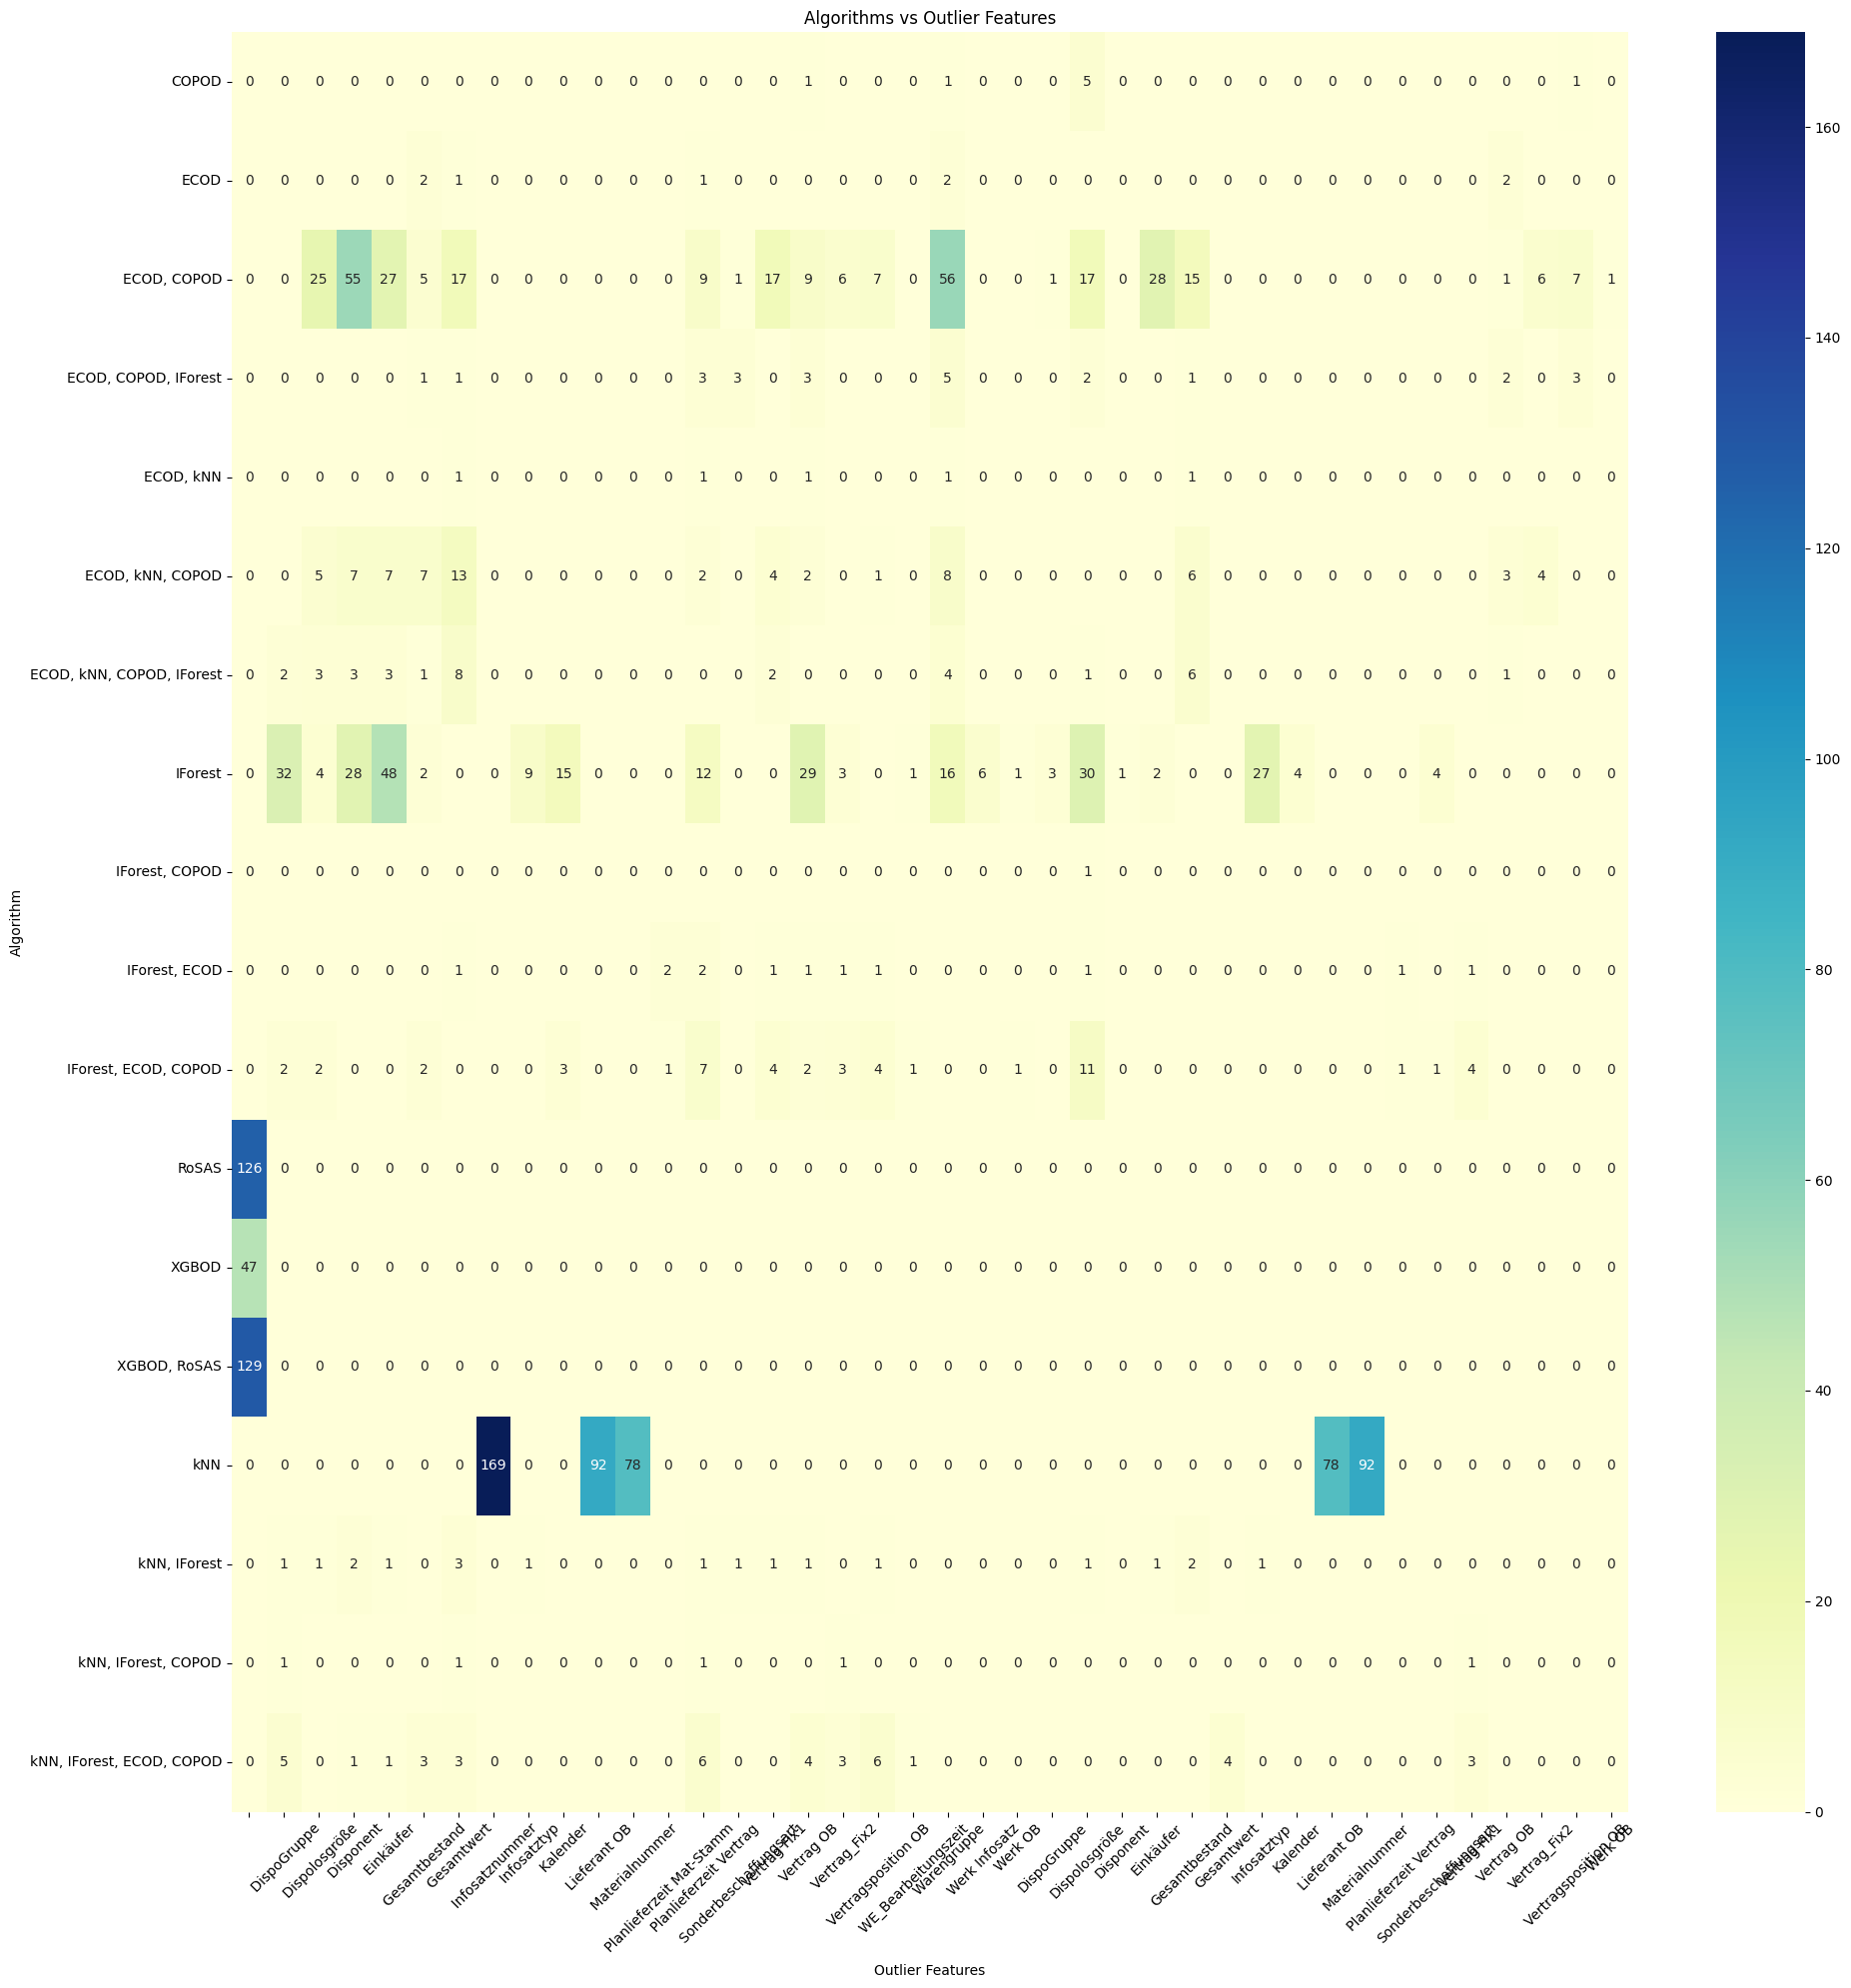

Common Rows of Data based on UUID:
                                 uuid     algorithm
450  32130c1cd91f42939f6df6360a196d26  XGBOD, RoSAS
451  8748ba915a0f4b479d0cad7988685df3         XGBOD
452  4cd52a7c11d645a3b61eec0d325a1984  XGBOD, RoSAS
609  32130c1cd91f42939f6df6360a196d26  XGBOD, RoSAS
610  8748ba915a0f4b479d0cad7988685df3         XGBOD
612  4cd52a7c11d645a3b61eec0d325a1984  XGBOD, RoSAS


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('final_anomalies.csv')

# Fill NaN values in 'outlier_features' column with an empty string
df['outlier_features'] = df['outlier_features'].fillna('').apply(lambda x: x.split(','))

# Group by algorithm and count the occurrence of each outlier feature
algorithm_outlier_counts = df.explode('outlier_features').groupby(['algorithm', 'outlier_features']).size().reset_index(name='count')

# Pivot the data to visualize algorithms vs outlier features
pivot_data = algorithm_outlier_counts.pivot(index='algorithm', columns='outlier_features', values='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Algorithms vs Outlier Features')
plt.xlabel('Outlier Features')
plt.ylabel('Algorithm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot
plt.savefig('algorithm_outlier_features_heatmap.png')

# Show the plot
plt.show()

# Find common rows of data based on the UUID
common_rows = df[df.duplicated(subset=['uuid'], keep=False)]
print("Common Rows of Data based on UUID:")
print(common_rows[['uuid', 'algorithm']])
